# Supervised ML - Decision Tree - C5.0 Entropy (Iris Flower)
# Using Entropy Criteria - Classification Model

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Import Dataset
iris=pd.read_csv('Database/iris1.csv')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [6]:
# Apply Label Encoding
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [7]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [8]:
# Optionally list down column names
col_names=list(iris.columns)
col_names

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

## Model Building
### Building/Training Decision Tree Classifier (C5.0) using Entropy Criteria

In [9]:
x=iris.iloc[:,0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=iris['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [11]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

0.9833333333333333

[Text(125.55000000000001, 190.26, 'X[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

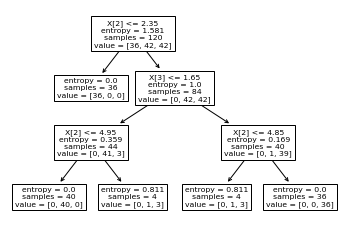

In [14]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(348.75, 792.75, 'Petal.Length <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [36, 42, 42]\nclass = versicolor'),
 Text(232.5, 566.25, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(465.0, 566.25, 'Petal.Width <= 1.65\nentropy = 1.0\nsamples = 84\nvalue = [0, 42, 42]\nclass = versicolor'),
 Text(232.5, 339.75, 'Petal.Length <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(116.25, 113.25, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(348.75, 113.25, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(697.5, 339.75, 'Petal.Length <= 4.85\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica'),
 Text(581.25, 113.25, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(813.75, 113.25, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]\nclass = virginica')]

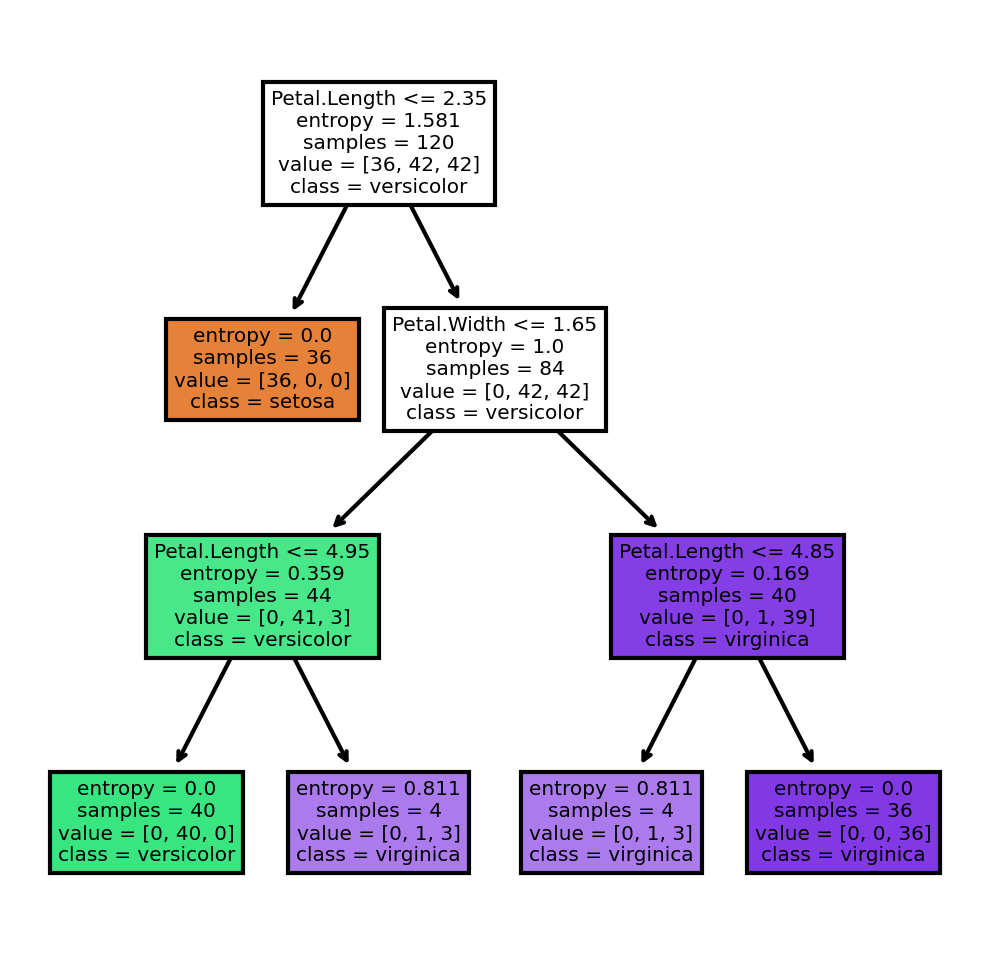

In [15]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

### Validation & Testing Decision Tree Classifier (C5.0) Model

In [16]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [17]:
pd.Series(pred).value_counts() # For value_count of array

0    14
2     9
1     7
dtype: int64

In [18]:
y_test.value_counts()

0    14
2     8
1     8
Name: Species, dtype: int64

In [19]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1,2
Species,,,
0,14,0,0
1,0,7,1
2,0,0,8


In [20]:
# C5.0 Entropy - Test Model Accuracy
model_entropy.score(x_test,y_test)

0.9666666666666667